In [3]:
import numpy as np              # load numerical module
import matplotlib.pyplot as plt # load plotting module
import astropy.io.fits as fits  # load FITS module


###  Let's practice some error propagatin again!

### 1. Find the value and errors for the following physical quantities:

### (6 min)
1. You know the parallax to $\alpha$ Centauri is 768.5004$\pm$0.2030 mas. What is its distance (and error) from the Earth?

### (6 min)
2. Sirius has an apparent magnitude of $m=-1.46$. Knowing that its distance from the Earth is 2.670$\pm$0.002 pc, what is its absolute magnitude (and error)? (assume no interstellar reddening and $dm = 0.01$).

### (10 min)
3. Assume that the Earth has an orbital period of $P_\oplus$=365.256$\pm$0.001 days, and a distance of $d_\oplus$=1.000$\pm$0.001 AU from the Sun (note that these are imaginary errors). What is the distance from the Sun for a planet with an orbital period of $P = 4333.01\pm 0.02$ days?

In [2]:
#1
# d = [pc] = 1/p [arcsec]
p, dp = 0.7685004, 0.002030

d = 1 / p 
dd = p**(-2) * dp

print('the distance to $\alpha$ Cen is {0:.6f}+-{1:.6f}'.format(d,dd)) 

the distance to $lpha$ Cen is 1.301235+-0.003437


In [3]:
#2 
# m-M = -5 log10(d[pc] / 10)
m, dm = -1.46, 0.01
ds, dds = 2.67, 0.002

M = m - 5*np.log10(ds / 10.0)
dM = np.sqrt((dm)**2 + (5*10*dds / (ds*np.log(10)))**2)

print('the absolution magnitude of Sirius is {0:.5f}+-{1:.5f}'.format(M,dM))

the absolution magnitude of Sirius is 1.40744+-0.01909


In [38]:
#3
p, dp = 365.256, 0.001
a, da = 1.000, 0.001
p2, dp2 = 4333.01, 0.02

#kepler's 3rd law of motion: p^2 ~ a^3
# p**2 / a**3 = p2**2 / a2**3

a2 = a * (p2/p)**(2/3)

par1 = (p2/p)**(2/3)                               #partial over a
par2 = a/(p**(2/3)) * (2/3) * (p2)**(-1/3)         #partial over p2
par3 = a * (p2**(2/3)) * (-2/3) * (1/p**(-1/3))    #partial over p

da2 = np.sqrt( (par1 * da)**2 + (par2 * dp2)**2 + (par3 * dp)**2)

print("the distance is {0:.3f}+-{1:.3f} AU".format(a2, da2))

the distance is 5.201+-1.267 AU


### Key probability functions for astro: Poisson & Gaussian

### Poisson distribution: 


- discrete probability distribution! 


<br>
<br>



 $$\bar x = N$$
 



 $$\sigma = \sqrt{N}$$
 


- $\bar x$ is signal and $\sigma$ is noise, so the SNR is:

$$\mbox{SNR} = \frac{\bar x}{\sigma} = \frac{N}{\sqrt{N}} = \sqrt{N}$$

- Quality of data improves as $\sqrt{\mbox{number of counts}}$
- ...IF uncorrected systematics are well below $\sigma$!

### Example: 

- Observing a nearby SN at a given wavelength we received $10^3$ photons in time $t$, while for a nearby star we received $60$ photons. Assuming a total background noise of 20 photons, what is the SNR of our two targets? 
    - is one detection more trustworthy than the other? what if we got only $10$ photons from the second source?

In [41]:
n1 = 1e3
n2 = 60
n_bckg = 20

snr1 = n1/ np.sqrt(n1 + n_bckg)
snr2 = n2 / np.sqrt(n2 + n_bckg)
print(snr1, snr2)

31.311214554257475 6.7082039324993685


### Gaussian distribution: 
### Gaussian is the limiting case of Poisson as number of events gets large 

$$ p(x) = \frac{1}{\sigma \sqrt 2\pi} \mathrm{exp}[-\frac{1}{2} (\frac{x-\mu}{\sigma})^2]$$

- **Confidence interval**: probability that a draw lies inside a given range.
- A confidence interval is the scientific statement of how well you know something.
- For a Gaussian (and **ONLY** for a Gaussian!):
- 1$\sigma$ = 68% of measurements closer to mean than this
- 2$\sigma$ = 95% of measurements closer to mean than this
- 3$\sigma$ = 99% of measurements closer to mean than this
- The 3$\sigma$ confidence interval for a Gaussian is 99%.
- The error bar indicates a confidence interval.

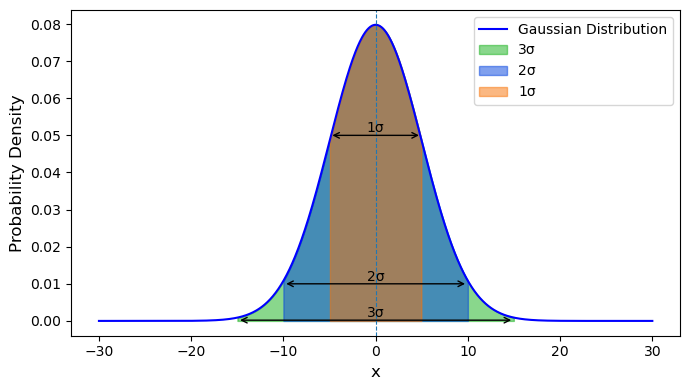

In [42]:
from scipy.stats import norm  #normally you don't do this here ;) 

# Define mean and standard deviation
mu, sigma = 0, 5

# Generate x and y values
x = np.linspace(-30, 30, 1000)
y = norm.pdf(x, mu, sigma)

# Create the plot
plt.figure(figsize=(7, 4))
plt.plot(x, y, label='Gaussian Distribution', color='blue')

# Highlight 1σ, 2σ, and 3σ regions
colors = ['xkcd:green', 'xkcd:blue', 'xkcd:orange']
sigma_ranges = [(mu - 3*sigma, mu + 3*sigma), (mu - 2*sigma, mu + 2*sigma), (mu - sigma, mu + sigma)]
alphas = [.7, .5, .2]
labels = ['3σ', '2σ', '1σ']

for i, (start, end) in enumerate(sigma_ranges):
    plt.fill_between(x, y, where=(x >= start) & (x <= end), color=colors[i], alpha=0.5, label=labels[i])

#add vertical line at 0:
plt.axvline(0, linestyle='--', linewidth=0.8)


# Define y-position for horizontal arrows
arrow_y = [0.05, 0.01, 0.0002]
arrow_props = dict(arrowstyle='<->', color='black')

# Add horizontal arrows and labels for 1σ, 2σ, and 3σ
for i in range(1, 4):
    plt.annotate('', xy=(mu - i*sigma, arrow_y[i-1]), 
                 xytext=(mu + i*sigma, arrow_y[i-1]), arrowprops=arrow_props)
    plt.text(mu, arrow_y[i-1], f'{i}σ', ha='center', va='bottom', fontsize=10)

# Labels and legend
plt.xlabel('x', fontsize = 12)
plt.ylabel('Probability Density', fontsize = 12)
plt.legend(fontsize = 10)
plt.tight_layout()


dm= plt.show()


# ------------
## Maximum Likelihood
# ------------

### Max likelihood: "the most probable value for the mean $\mu$ of an observed sample distribution is the one that has the maximum probability $P(\mu)"$

### Assume the Gaussian distr: 
- prob to observe a $x_i$ is: $P_i = (\frac{1}{\sigma \sqrt{2\pi}}) \mathrm{exp}(-0.5 (\frac{x_i-\mu}{\sigma})^2)$
- prob to observe the N $x_i$ we have in our dataset is: 
$P = (\frac{1}{\sigma \sqrt{2\pi}})^N \mathrm{exp}(-0.5 \Sigma(\frac{x_i-\mu}{\sigma})^2)$
- what do we need in orfer for $P$ to be max? minimize:  $-0.5 \Sigma(\frac{x_i-\mu}{\sigma})^2$ ==>

$$ \mu = \bar x = \frac{1}{N} \Sigma x_i $$ 
the most probable value is just our average!

### What is the error in the mean of many measurements?
- Let's start from this: $\bar x = \frac{1}{N}\sum x_{i}$ 


- If our data come from same parent dist $\sigma_{x_i} = \sigma_x$
- From error popagation: $\sigma^2_{\bar x}$ = $\Sigma( \sigma_{x_i} \frac{\partial\mu}{\partial x_i} )^2 $ (what is implied here? no correlation between $x_i$; reasonable for normal data we would be dealing with) <br> since $\sigma_{x_i} = \sigma_x = \bar x$  $\rightarrow$ $\frac{\partial\mu}{\partial x_i} = \frac{ \frac{1}{N} \Sigma x_i }{\partial x_i} = \frac{1}{N}$ so that: $ \sigma^2_{\bar x} = \frac{\sigma^2_x}{N}  $ or


$$
\sigma_{\bar x}{} \simeq \frac{\sigma_x}{\sqrt{N}}
$$

   - The error in the mean depends on the standard deviation and improves with $\sqrt{N}$.
   - Get more photons/data/... improve your understanding of your data (up to a point)
       - limited resources (telescope time is precious!)
       - systematics (can try to correct up to a point...)
       - non statistical fluctuations in your data (e.g., outliers; some can be corrected, but always risk that there are things you didn't think of/can't correct for...don't trust results at a few $\sigma$)
   - NOTE: This is not the scatter in the measurements, it is the error in the mean, estimated from the measurements.
   



#### Summing up, for our dataset with N measurements:
$\mu = \bar x = \frac{1}{N} \Sigma x_i$ and $\sigma_\mu = \frac{\sigma}{\sqrt{N}}$

- Bev. chapters 3 and 4 show how to average according to weights calculated from uncertainties.
- They also discuss pragmatic reasons for doing this vs. discarding old data, and the limitations to taking more data to improve $\sigma$ through large $N$.

### When doing a data analysis we aim to find the best estimates $\bar x, \sigma$ of the mean and its uncertainty and to see 
  - how confident are we in this result? 
  - how well have we captured the parent distr. properties?
  
  
### if we would repeat the experiment N times we would get $\bar x_j, \sigma_j$ with our $\bar x_j$ following a gaussian around the true (parent) $\mu$ with width $\frac{\sigma}{\sqrt{N}}$

### more data == more time/money though; are there ways around it?



## Monte Carlo: 
- numerical integrations of functions that can be graphed and don’t have simple analytic solution 
- simulations of random variables using random samples from a uniform distribution 
- estimation of uncertainties in the best-fit parameters of analytical models used to fit data 

For calculating uncertainties, e.g.,:
- Program the problem 
- Generate samples of fake measurements distributed according to their uncertainties.
- Evaluate the function for each draw in the sample.
- Calculate the uncertainty.
- Note: This gives an answer, but no information on which parameters it’s sensitive to.
- To do that, vary each $\sigma_i$ and do the above many times.

- For more details see Bev. ch. 5

In [6]:
# example 1: MC to calculate pi

#define the unit circle
R = 1

#draw a random 10,000,000 numbers for x and y in the range 0 to 1. 
# Check if $x^2 + y^2 \lesssim R^2$. If so, add one to your counter:

N = 1000      # how many samples will we use? try 100, 1000, 100000, 10000000
c = 0        # start counter

# go through all your samples:
for i in range(0,N):
    #draw a random number between 0 and 1 for x and y
    x = np.random.random()
    y = np.random.random()
    
    #calculate r
    r = x ** 2 + y ** 2
    #if it is in the unit circle add one to counter
    if r<=1:
        c+=1
        
# what is c?
print('c:', c )


# what is c/N?
print('c/N:', c / N )

#finally:
print('pi approx:', 4 * c / N )

c: 773
c/N: 0.773
pi approx: 3.092


In [7]:
# example 2:
# Now, assume we have some data we observed and we want to find our best-fit model 
# but also the uncertainty in our estimated best-fit parameters:
# - generate N synthetic "observations" based on your real observations assuming gaussian distr
# - find best-fit parameters for your synth observations
# - find posterior distribution of your best-fit params ($a \pm da$ )


# imaginary observed data for car moving over t distances s
t = np.arange(1,22,2)
s = [ 11.80487185,  46.07654076 , 57.27329417 , 94.31029188, 146.48665845,
 185.33660777, 236.5500788,  318.94164082, 388.45874659, 475.7783416,
 555.86899163] 

In [8]:
#the car was probably accelerating, and we want to find out by how much. Make funct to fit data:
def distance_with_acceleration_print(t, u, c, a):
    """Calculate the distance travelled with at a constant speed u for a known time
    and constant acceleration a."""
    
    return c + u* t + 0.5 * a * t**2 

Text(0, 0.5, 'Distance')

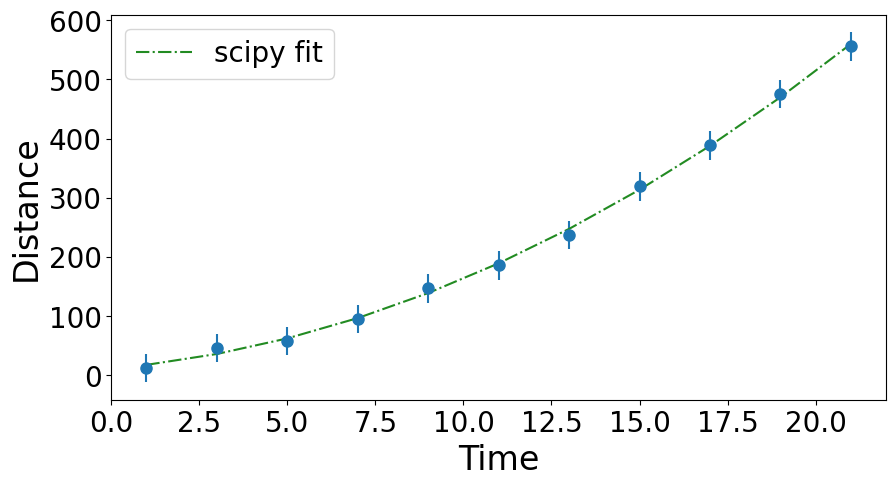

In [9]:
#use curve_fit to fit data 
from scipy.optimize import curve_fit
t2, v2 = curve_fit( distance_with_acceleration_print, t , s, 
                       absolute_sigma = True, sigma = np.zeros( len( t ) ) + 12 )
# and plot it to see how good our best-fit model is
plt.figure( figsize = ( 10, 5 ) )


#note that here yerr doesn't make sense..too large in comp to accuracy of s...but for vizualisation OK
plt.errorbar( t, s, yerr = 24., linestyle = 'none', marker='o', markersize = 8 )

plt.plot( t, distance_with_acceleration_print( t, *t2), linestyle='-.', color='forestgreen',label ='scipy fit')

plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Distance', fontsize = 24)



In [10]:
print( 'our best-fit model is:  c: {1:.2f}, u:  {0:.2f}, a: {2:.2f} '.format( t2[0],t2[1], t2[2] ) )

our best-fit model is:  c: 10.93, u:  5.22, a: 1.99 


In [11]:
(fit2, cov_x, infodict, mesg, ier) = curve_fit( distance_with_acceleration_print, t , s, 
                       full_output = True, sigma = np.repeat(.0000010,len(s)), absolute_sigma=True)
fiterr2 = np.sqrt(np.diag(cov_x))

print("Status: {0:d}".format(ier)) # 1 = solution found
print(mesg)
print("Reduced chi-squared:{0:.4e}".format(np.sum(
    distance_with_acceleration_print(t,*fit2) - s)**2 / (len(s) - fit2.size))) # reduced chi-squared
print("Results and uncertainties:")
print(np.array((fit2, fiterr2)).T) # ok, now the results
print("Covariance matrix:")
print(cov_x)  # and errors, including covariance terms
print("# function evals: {0:d}".format(infodict['nfev']))


Status: 1
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
Reduced chi-squared:1.6254e-26
Results and uncertainties:
[[5.22052116e+00 1.93724403e-07]
 [1.09311005e+01 9.18606281e-07]
 [1.99318001e+00 1.70697199e-08]]
Covariance matrix:
[[ 3.75291444e-14 -1.54807718e-13 -3.20512877e-15]
 [-1.54807718e-13  8.43837500e-13  1.18007013e-14]
 [-3.20512877e-15  1.18007013e-14  2.91375339e-16]]
# function evals: 9


In [12]:
# good fit, but what are the uncertainties in our c, u and a? 

# Let's use MC to make N_trial permutations of our observations and fit these fake obs:
N_trials = 10000
c_fits = np.array( [])
for q in range( N_trials ):
    x_test = np.random.uniform(1 , 22, len( t )) # assume we observed random other times, between the ones we did; 
                                                 # flat prior for all values 
    y = 11. + 5.2 * x_test + 0.5 * 2. * x_test**2 
    y_test = y + 2. * np.random.random( len (y ) ) #and add some noise to the obs locations
    
    try:
        t3, v3 = curve_fit( distance_with_acceleration_print , 
                       x_test ,y_test ,absolute_sigma = True, 
                           sigma = np.zeros( len( t ) ) + 12) 
    
    except:
        continue
    
    if np.size( c_fits ) < 1:
        c_fits = np.copy( t3 )
    else:
        c_fits = np.vstack(( c_fits, t3 ))


In [13]:
print( '''our best-fit model is:  c: {1:.2f}+- {4:.2f}, 
                        u:  {0:.2f}+-{3:.2f}, 
                        a: {2:.3f}+-{5:.3f} '''.format( np.mean( c_fits[ :, 0 ] ),
                            np.mean( c_fits[ :, 1 ] ), 
                            np.mean( c_fits[ :, 2 ] ),np.std( c_fits[ :, 0 ] ) , np.std( c_fits[ :, 1 ] ),
                            np.std( c_fits[ :, 2 ] ) ) )


our best-fit model is:  c: 11.99+- 0.96, 
                        u:  5.20+-0.18, 
                        a: 2.000+-0.015 


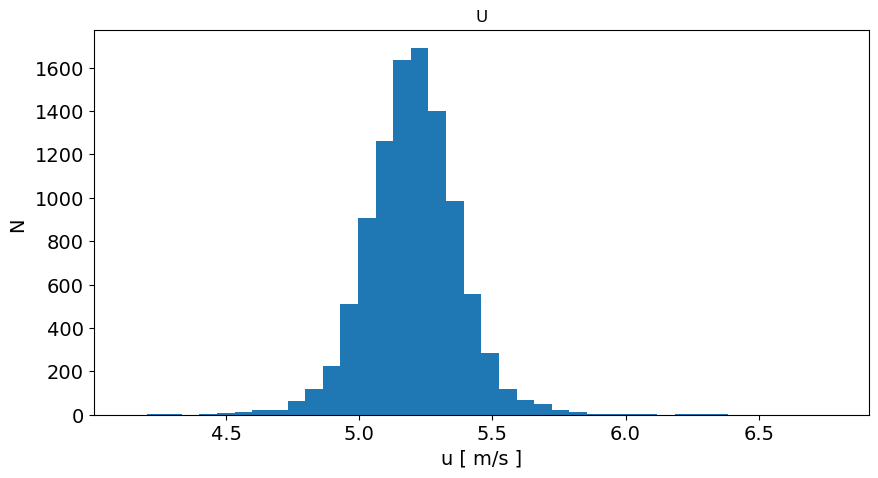

In [14]:
plt.figure( figsize = ( 10, 5 ) )
plt.hist( c_fits[ :, 0 ], bins = 40 )
plt.xlabel('u [ m/s ]', fontsize = 14 )
plt.ylabel('N ', fontsize = 14 )
plt.xticks( fontsize = 14 )
plt.yticks( fontsize = 14 )
dum=plt.title('U')

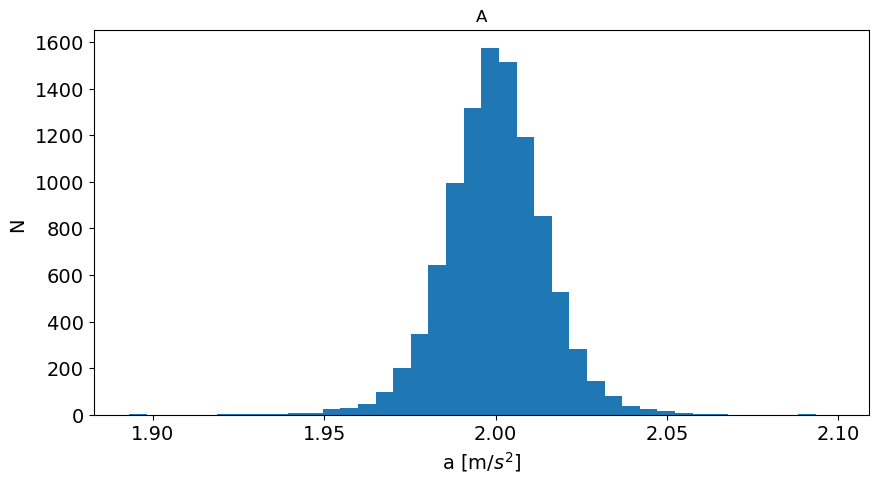

In [15]:
plt.figure( figsize = ( 10, 5 ) )
plt.hist( c_fits[ :, 2 ], bins = 40 )
plt.xlabel('a [m/$s^2$]', fontsize = 14 )
plt.ylabel('N ', fontsize = 14 )
plt.xticks( fontsize = 14 )
plt.yticks( fontsize = 14 )
dum=plt.title('A')

### Student t-test:
- for small dataset both our calculated $\mu$ and $\sigma$ might be poorly determined
- determine whether two samples are drawn from the same parent distr. 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

## ----------------------
## Fitting models to data
## ----------------------

### Readings: Bev. Chapters 6, 8, 10 and 11

### General idea:
- Have some data from your observations/experiment and a set of theoretical equations, or a *model*.
- Some parameters are known, some are not.  Unknowns are called *free parameters*.
- Want to find values of the free parameters so the model fits the data as well as possible.
    - **MUST** have more data points than free parameters!
- Can estimate both parameters and their uncertainties, if enough data.


- Generally use maximum likelihood to decide which model is best (least squares is a special case).
- Sometimes can be done with minimization calculus, other times must be done numerically (see Bevington Ch. 8).
- There are Python routines for line fits and for generalized fits.
- Often problems can be reduced to or approximated by line fits.
- Always check goodness of fit, not just errors!

### Least squares

- We have measurements $(x_i, y_i)$ and we assume uncertainty $\sigma_i$ are mainly in $y$.
- We know data should follow model: $y = a + bx$

- Want to find a,b that minimize $\Delta y_i = y_i-y(x_i)=y_i-a-bx_i$



- Assume data follow Gaussian (remember that even if they follow Poisson for large number of data it approximates Gaussian).  Then the probability of getting any single measurement is:
$ P_{i} = \frac{1}{\sqrt{2\pi\sigma_{i}^{2}}} \exp\left\{ -\frac{1}{2} \left[\frac{y_{i}-a-bx_{i}}{\sigma_{i}^{}}\right]^{2}
              \right\}$


- Probability for the whole dataset (N values) is:
$
P(a,b) = \prod_{i=1}^{N}{P_{i}} = \prod{\left(\frac{1}{\sigma_{i}\sqrt{2\pi}}\right)}
          \exp\left\{ -\frac{1}{2}\sum{\left[\frac{y_{i}-a-bx_{i}}{\sigma_i}\right]^{2}}
              \right\}$
              

- We want to maximize $P(a, b)$ ==> we need to minimize exponent:
- **Minimize** goodness of fit parameter $\chi^2$:  
$$\chi^2 = \sum_{i=1}^{N}{\left[\frac{1}{\sigma_i}(y_{i}-a-bx_{i})\right]^{2}}$$

Need: 
$$
\frac{\partial\chi^2}{\partial\alpha} = 
\frac{\partial}{\partial\alpha} \sum{\left[\frac{1}{\sigma_{i}{}}(y_{i}-a-bx_{i})\right]^{2}} =
-2\sum{\left[\frac{1}{\sigma_{i}^{2}}(y_{i}-a-bx_{i})\right]}=0 $$

$$\frac{\partial \chi^2}{\partial b} = \frac{\partial}{\partial b} \sum{\left[\frac{1}{\sigma_i}(y_{i}-a-bx_{i})\right]^2} = -2\sum{\left[\frac{x_i}{\sigma_{i}^{2}}(y_{i}-a-bx_i)\right]}=0 
$$


- Rearrange:

$$\sum{\frac{y_i}{\sigma_{i}^{2}}} = a\sum{\frac{1}{\sigma_{i}^{2}}} + b\sum{\frac{x_{i}}{\sigma_{i}^{2}}} $$

$$\sum{\frac{x_i y_i}{\sigma_{i}^{2}}}=a\sum{\frac{x_i}{\sigma_{i}^{2}}}+ b\sum{\frac{x_{i}^{2}}{\sigma_{i}^{2}}}$$


(notice form is: 
$$ C = aD+bE $$
$$ F = aE+bG $$ so that we can solve using determinants and get: )

$$ a = \frac{1}{\Delta}(  \sum{\frac{x_{i}^{2}}{\sigma_{i}^{2}}} \sum{\frac{y_i}{\sigma_{i}^{2}}}-
\sum{\frac{x_{i}}{\sigma_{i}^{2}}} \sum{\frac{x_i y_i}{\sigma_{i}^{2}}}) $$

$$ b = \frac{1}{\Delta}(\sum{\frac{1}{\sigma_{i}^{2}}} \sum{\frac{x_i y_i}{\sigma_{i}^{2}}}-
\sum{\frac{x_{i}}{\sigma_{i}^{2}}} \sum{\frac{y_i}{\sigma_{i}^{2}}}) $$

with $$ \Delta = \sum{\frac{1}{\sigma_{i}^{2}}} \sum{\frac{x_{i}^{2}}{\sigma_{i}^{2}}}-\left(\sum{\frac{x_{i}}{\sigma_{i}^{2}}}\right)^{2} $$

<br>
<br>

- If all uncertainties are the same ($\sigma_i  = \sigma) $:
$$ a = \frac{ \sum x_i^2 y_i \sum y_i -\sum x_i \sum x_i y_i }{N \sum x_i^2 -(\sum x_i)^2 }$$ and 
$$ b = \frac{ \sum N x_i y_i \sum y_i -\sum x_i \sum y_i }{N \sum x_i^2 -(\sum x_i)^2 }$$ 

#### Of course, $a$ and $b$ also have uncertainties:

$$\sigma^2_a = \frac{1}{\Delta}\left( \sum{\frac{x_{i}^{2}}{\sigma^2_i}} \right), \sigma^2_b = \frac{1}{\Delta}\left( \sum{\frac{1}{\sigma^2_i}} \right)  $$

- Linear fitting doesn't work if there is more than a multiply and an add parameter
    - E.g., multiply, add, and shift
- Could derive a new expression like linear least squares formulae *Or,* do it numerically:
   - Define a Python function that has parameters of model as inputs
       - Usually the parameters are in a vector
   - Run [`scipy.optimize.leastsq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) on the data with the function
       - It finds the optimal values, and errors!
       - Can be slow, depending on model and data space
       - Can be fooled if data space is strange: local minima in $\chi^2$ space
       - What `scipy.optimize.leastsq` does is:
           - Evaluate the function
           - Compute $\chi^2$ *vs.* data
           - Vary the parameters and repeat
           - It explores parameter space, looking for the minimum $\chi^2$
           - It uses a function minimization routine
           - Calculates gradients in $\chi^2$ and walks down them
           - Parameter errors are related to second derivatives near $\chi^2$ minimum

#### 1. Demo: linear data

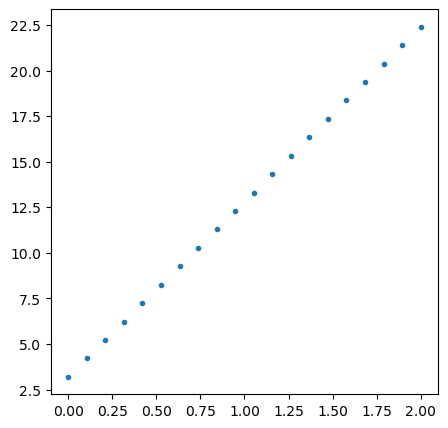

In [45]:

import linfit as L

# Random values along the x-axis
nx = 20
lo =  0.
hi =  2.

# line parameters
m = 9.6
b = 3.2

x = np.linspace(lo, hi, nx)
y = m * x + b

plt.figure(figsize=(5,5))
plt.plot(x, y, '.')
dummy=0

(np.float64(3.2000000000000055), np.float64(9.599999999999994))


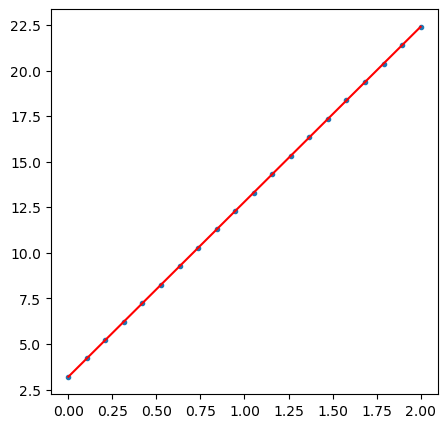

In [46]:
ret = L.linfit(y, x)
print(ret[0:2])

plt.figure(figsize=(5,5))
plt.plot(x, y, '.')
plt.plot(x, ret[0]+ ret[1]*x, 'r-')
dummy=0

# great fit! (data are too perfect)

Intercept: 3.054691 +- 0.430946, input: 3.200000, normres: 0.337187 sigma
Slope    : 9.706226 +- 0.368394, input: 9.600000, normres: -0.288348 sigma


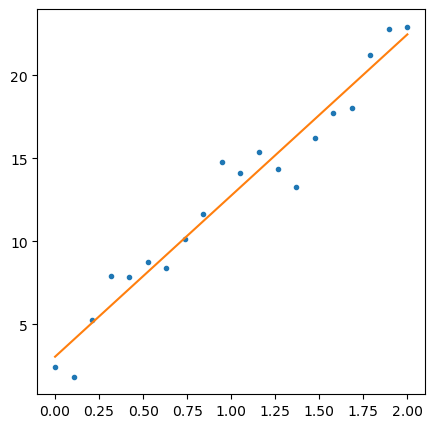

In [47]:
# Add noise and do the same trick:

sigma = 1.
errs  = np.random.normal(scale=sigma, size=nx)
yerr  = y + errs

ret = L.linfit(yerr, x)
print(r"Intercept: %f +- %f, input: %f, normres: %f sigma" % (ret[0], ret[2], b, (b - ret[0]) / ret[2]))
print(r"Slope    : %f +- %f, input: %f, normres: %f sigma" % (ret[1], ret[3], m, (m - ret[1]) / ret[3]))
plt.figure(figsize=(5,5))
plt.plot(x, yerr, '.')
plt.plot(x, ret[1] * x + ret[0])
dummy=0

In [19]:
# Actually, that was cheating.  We have to check some things:

(af, bf, a_unc, b_unc, chisq, prob, covar, yfit) = \
     L.linfit(yerr, x, y_unc=sigma)
print('# a = {0:.3f} +- {1:.3f}'.format(af, a_unc))  # Only believe these if the rest makes sense!
print('# b = {0:.3f} +- {1:.3f}'.format(bf, b_unc))  #   "
print('# chisq = {0:.3f}'.format(chisq))        # Chi-squared should be close to N-m (degrees of freedom)
print('# prob  = {0:.3f}'.format(prob) )        # Even 0.1 is believable.  Much lower (e.g., 0.001) is not!
print('# covar = ')                             # Covariance matrix: uncertainties = sqrt(diag(covar))
print('# ' + str(covar))
print('# reduced chisq = {0:.3f}'.format(chisq / (x.size - 2)))  # Chi-squared / (N-m) should be around 1

# a = 4.249 +- 0.431
# b = 8.535 +- 0.368
# chisq = 18.554
# prob  = 0.420
# covar = 
# [[ 0.18571429 -0.13571429]
 [-0.13571429  0.13571429]]
# reduced chisq = 1.031


#### 2. Demo: non-linear data

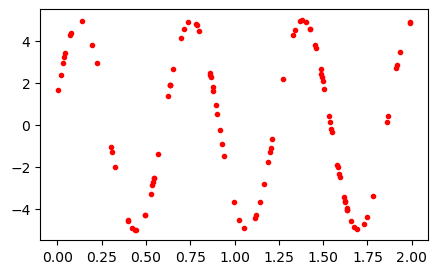

In [52]:
# make a sinusoidal dataset:

amp   =  5.
freq  = 10.
phase =  0.3

#make nx datapoints uniformly distributed 
nx = 100
x  = np.random.uniform(0, 2, nx)

par = np.array([amp, freq, phase])  # parameter array for fitting



def gensin(x, par):
    amp   = par[0]  # unpack parameter array
    freq  = par[1]
    phase = par[2]
    
    return amp * np.sin(freq * x + phase)

# note we could get the same result in one line thanks to numpy: amp* np.sin(freq*x+phase) 
# but we will need to call the function later on, so we do it like this
model = gensin(x, par)
plt.figure(figsize=(5,3))
dm = plt.plot(x, model, 'r.')  #dummy = 0

Status: 2
The relative error between two consecutive iterates is at most 0.000000
Reduced chi-squared:4.6762e-32
Results and uncertainties:
[[ 5.          0.14826835]
 [10.          0.04991394]
 [ 0.3         0.05860475]]
Covariance matrix:
[[ 2.19835037e-02 -4.56531244e-05 -1.21730486e-04]
 [-4.56531244e-05  2.49140100e-03 -2.59279303e-03]
 [-1.21730486e-04 -2.59279303e-03  3.43451720e-03]]
# function evals: 21


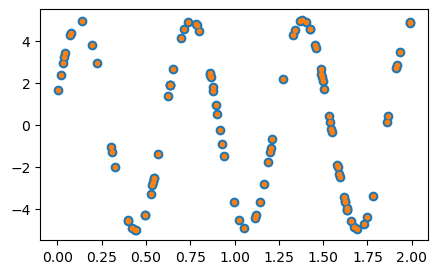

In [54]:
# Function minimization fitting with spo.leastsq

import scipy.optimize as spo

# make initial guesses, slightly off
par = np.array([amp - 0.3, freq - 0.3, phase - 0.1]) 

#define funct that returns the residuals of data-model
def residuals(par):
    return (gensin(x, par) - model) 

#call the scipy,optimize.leastsq function:
(fit, cov_x, infodict, mesg, ier) = spo.leastsq(residuals, par, full_output=True)
fiterr = np.sqrt(np.diag(cov_x))

# check status FIRST!
print("Status: {0:d}".format(ier)) # 1 = solution found; see also:
            # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html
print(mesg)
print("Reduced chi-squared:{0:.4e}".format(np.sum(residuals(fit)**2) / (nx - fit.size))) # reduced chi-squared
print("Results and uncertainties:")
print(np.array((fit, fiterr)).T) # ok, now the results
print("Covariance matrix:")
print(cov_x)  # and errors, including covariance terms
print("# function evals: {0:d}".format(infodict['nfev']))

plt.figure(figsize=(5,3))
plt.plot(x, gensin(x, fit), 'o')
dm =plt.plot(x, model, '.')

[10.  15.   5.3]
Status: 1
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
Reduced chi-squared:1.1608e+01
Results and uncertainties:
[[ 1.38947822  0.14683954]
 [14.59487524  0.17104753]
 [ 5.58900811  0.1963092 ]]
Covariance matrix:
[[ 0.02156185 -0.00082684  0.00077485]
 [-0.00082684  0.02925726 -0.02906216]
 [ 0.00077485 -0.02906216  0.0385373 ]]
# function evals: 88


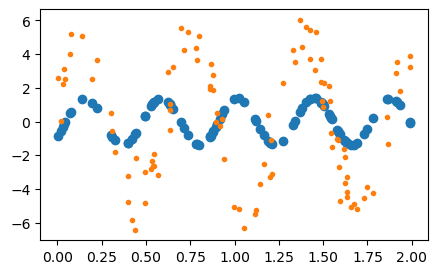

In [56]:
# Add noise and try again:

sigma = 1.
errs  = np.random.normal(scale=sigma, size=nx)
yerr  = model + errs


par = np.array([amp + 5,   freq + 5,   phase + 5]) # initial guesses, slightly off

print(par)
def residuals(par):
    return (gensin(x, par) - yerr) / sigma

(fit, cov_x, infodict, mesg, ier) = spo.leastsq(residuals, par, full_output=True)
fiterr = np.sqrt(np.diag(cov_x))

# check status FIRST!
print("Status: {0:d}".format(ier)) # 1 = solution found
print(mesg)
print("Reduced chi-squared:{0:.4e}".format(np.sum(residuals(fit)**2) / (nx - fit.size))) # reduced chi-squared
print("Results and uncertainties:")
print(np.array((fit, fiterr)).T) # ok, now the results
print("Covariance matrix:")
print(cov_x)  # and errors, including covariance terms
print("# function evals: {0:d}".format(infodict['nfev']))

plt.figure(figsize=(5,3))
plt.plot(x, gensin(x, fit), 'o')
plt.plot(x, yerr, '.')
dummy=0

Initial guess: [ 5.1 10.1  0.4]
Status: 1
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
Reduced chi-squared:1.1135e+00
Results and uncertainties:
[[ 5.02522035  0.13747708]
 [10.04001892  0.04801093]
 [ 0.23876008  0.05221219]]
Covariance matrix:
[[ 0.01889995  0.00083623 -0.00098985]
 [ 0.00083623  0.00230505 -0.0020722 ]
 [-0.00098985 -0.0020722   0.00272611]]
# function evals: 17


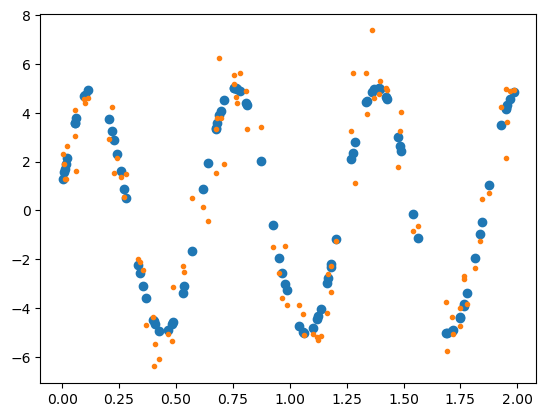

In [23]:
# That plot and that reduced chi-squared are both TERRIBLE!  It converged, but on a wrong answer.
# This is a LOCAL minimum in chi-squared!  It is not the global minimum.
# Try starting closer to the right numbers (in reality, just have to try different numbers)

par = np.array([amp + 0.1, freq + 0.1, phase + 0.1]) # initial guesses, slightly off

print("Initial guess: ", end="")
print(par)

def residuals(par):
    return (gensin(x, par) - yerr) / sigma

# Pro tip: Anonymous functions (lambda functions) are a quick way to define a one-line function.
# They are often used for defining formula functions.
# The next line is identical to the definition above:
#
# residuals = lambda par: (gensin(x, par) - yerr) / sigma
#
# In both definitions, x, ndaterr, and nerrest got picked up from the envronment without being passed.
# Usually, we don't like that, but it's necessary here, as spo.leastsq() will call with 1 parameter.
# It wants a function of just the parameters it's varying.  There is no 'return' in a lambda function.
# It's assumed.

(fit, cov_x, infodict, mesg, ier) = spo.leastsq(residuals, par, full_output=True)
fiterr = np.sqrt(np.diag(cov_x))

# check status FIRST!
print("Status: {0:d}".format(ier)) # 1 = solution found
print(mesg)
print("Reduced chi-squared:{0:.4e}".format(np.sum(residuals(fit)**2) / (nx - fit.size))) # reduced chi-squared
print("Results and uncertainties:")
print(np.array((fit, fiterr)).T) # ok, now the results
print("Covariance matrix:")
print(cov_x)  # and errors, including covariance terms
print("# function evals: {0:d}".format(infodict['nfev']))

plt.plot(x, gensin(x, fit), 'o')
plt.plot(x, yerr, '.')
dummy=0

### $\chi$^2 

- assumes gaussian statistics
- expectation value for $\chi^2 = \nu$ (the degrees of freedom) ==> reduced $\chi_\nu^2$ == $\frac{\chi^2}{\nu}$ (expectation value of 1)
    - if $\chi_\nu^2>>1$ we may have poor measurements, incorrect assignment of uncertainties, or an incorrect choice of probability function
    - if $\chi_\nu^2<<1$ we probably have some misunderstanding of the experiment.

 <img src="chisqexamp.png" width=600 height=600 />
 source: Rackham+2017
 
 
 <img src="cornerplot_examp.png" width=400 height=400 />
source: Lueber+2020

### 2.  (15 min + 10 min w AI ): you are given the following observations. If you know that they should follow a law: $s = \frac{1}{2}a t^2 + b t+ c $, what is the best-fit model? Use scipy optimization to do your fit

In [24]:
t = np.arange(1,22,2)
s = np.array([ 11.80487185,  46.07654076 , 57.27329417 , 94.31029188, 146.48665845,
 185.33660777, 236.5500788,  318.94164082, 388.45874659, 475.7783416,
 555.86899163] )
serr = 12 + 25.*np.random.random(size=len(s))

In [25]:
#note that there is also the function curve_fit build on top of optimize; 

#from scipy.optimize import curve_fit

In [26]:


#(fit2, cov_x, infodict, mesg, ier) = curve_fit( trycurvefit, t , s, 
#                       full_output = True, sigma = serr, absolute_sigma=True)

In [27]:
# check status FIRST!
#print("Status: {0:d}".format(ier)) # 1 = solution found
#print(mesg)
#print("Reduced chi-squared:{0:.4e}".format(np.sum(trycurvefit(t,*fit2) - s)**2 / (len(s) - fit2.size))) # reduced chi-squared
#print("Results and uncertainties:")
#print(np.array((fit, fiterr)).T) # ok, now the results
#print("Covariance matrix:")
#print(cov_x)  # and errors, including covariance terms
#print("# function evals: {0:d}".format(infodict['nfev']))

#plt.errorbar(t, s, yerr= serr, color='firebrick', marker = 's' , linestyle = 'none')
#plt.plot(t, trycurvefit(t, *fit2) )
#dummy=0

#### 3. (35 minutes + 10 min with AI ) You are observing the thermal emission from a cloud of dust with ALMA in Chile. ALMA is a radio interferometer that observes in millimeter wavelengths. The flux density, $F\nu$, you measure at a particular frequency $\nu$ is proportional to the Planck function B$\nu$ and to the emissivity $\epsilon$ of the dust at that frequency: 

$$F_\nu \propto \epsilon(\nu)B_\nu$$ 

#### The Planck function is (as you may have learned in other classes) the usual: $B_\nu = \frac{2h\nu^3}{c^2} \frac{1}{e^{h\nu/kt} -1}$. However let's say that the dust is sufficiently warm that $h\nu$<< $kT$, so that $e^{h\nu/kt} \simeq 1+\frac{h\nu}{kT}$  and thus the Planck function becomes $B_\nu = \frac{2kT\nu^2}{c^2}$ or $B_\lambda = \frac{2kT}{\lambda^5}$, where $\lambda$ is the wavelength of the observation. Since the emissivity can just as well be considered a function of wavelength as of frequency, we can thus say that the flux density can be written as 

$$F_\nu = \frac{C}{\lambda^2}\epsilon(\lambda)$$ 

#### where C is a constant. A convenient characterization for $\epsilon(\lambda)$ is a power-law, $\epsilon(\lambda) \propto \lambda^k$, for some exponent $k$. If the dust's emissivity is constant at all wavelengths, then $k = 0$, but this is not known ahead of time. Let's say that the emissivity is known to be 1 (it's maximum value) at a reference wavelength of $\lambda_0$, so that we have $\epsilon(\lambda) = \frac{\lambda}{\lambda_0}^k$. Thus the true wavelength dependence of the flux density can be said to be 

$$F_\nu = \frac{C}{\lambda^2}\left(\frac{\lambda}{\lambda_0}\right)^k$$

#### But what about those constants? Suppose you know already from archival observations that the flux density at $\lambda_0= 0.36$ mm is $F_\nu = 1.00$ Jy and that the emissivity $\epsilon$ at that wavelength is 1. Suppose you also know that these are very well determined, far more so than the new data you collect, so you can consider them to be constants with negligible error bars. Thus constant $C$ from above must be $C = 0.130$ Jy mm2 and this has effectively no uncertainty.

#### You measures the cloud's flux density at 7 wavelengths. The data are given here:


| $\lambda $ [mm] |$F_\nu$ [Jy]|
| --- | --- | 
| 0.46	| 0.495 $\pm$ 0.052| 
| 0.69	| 0.193 $\pm$ 0.023| 
| 0.95	| 0.069 $\pm$ 0.012| 
| 1.25	| 0.0230 $\pm$ 0.0069| 
| 1.65	| 0.0186 $\pm$ 0.0038| 
| 2.10	| 0.0080 $\pm$ 0.0023| 
| 3.10	| 0.00222 $\pm$ 0.00090 |

1. plot the data making a publication-ready plot
2. use the appropriate method to fit your data and find the best-fit model k 
3. overplot the best-fit model to the data. What is the $\chi^2$? Is it reasonable?

In [4]:
#make data arrays:
l = np.array( [0.46, 0.69 , 0.95, 1.25, 1.65, 2.10, 3.10 ] )
fnu   = np.array( [0.495, 0.193, 0.069, 0.0230, 0.0186, 0.0080, 0.00222 ] )
dfnu  = np.array( [0.052, 0.023, 0.012, 0.0069, 0.0038, 0.0023, 0.00090 ] )

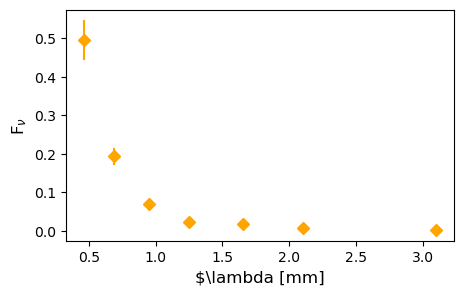

In [5]:
#start with plotting:
plt.figure(figsize=(5,3))
plt.errorbar(l, fnu, yerr=dfnu, color='orange', marker="D", linestyle='')
plt.xlabel( '$\lambda [mm]', fontsize=12)
plt.ylabel( 'F$_\\nu$ ', fontsize=12)
dummy=0

In [6]:
# hard-coded chi2 minimization:

C = 0.130
l0 = 0.36

#law followed is : F = (c/l**2) * (l/10)**k





In [7]:
#find min of chis:



In [10]:
import scipy.optimize as spo
from scipy.optimize import curve_fit

In [12]:
#define your function to be fit:
def alma(l, par):
    return (0.13/l**2) * (l/0.36)**par

#make initial guess k
par = (1.1,)

#define redisuals function
def residuals(par):
    return alma(l,par) - fnu/dfnu

#call scipy optimize:
(fit, cov_x, infodict, mesg, ier) = spo.leastsq(residuals, par, full_output=True)
fiterr = np.sqrt(np.diag(cov_x))

Status: 1
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
Reduced chi-squared:2.3109e+01
Results and uncertainties:
[[2.74149979 0.07183931]]
Covariance matrix:
[[0.00516089]]
# function evals: 14


TypeError: 'numpy.ndarray' object is not callable

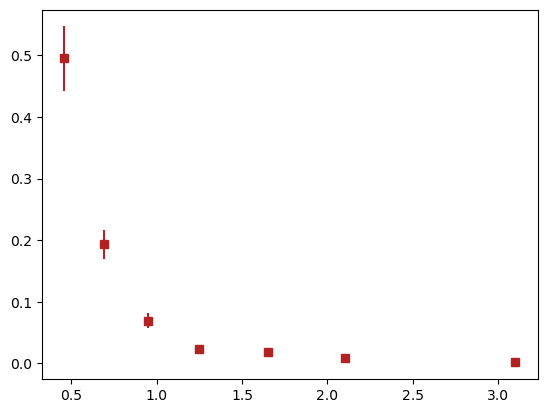

In [14]:

# check status FIRST!
print("Status: {0:d}".format(ier)) # 1 = solution found
print(mesg)
print("Reduced chi-squared:{0:.4e}".format(np.sum(residuals(fit)**2) / (len(l) - fit.size))) # reduced chi-squared
print("Results and uncertainties:")
print(np.array((fit, fiterr)).T) # ok, now the results
print("Covariance matrix:")
print(cov_x)  # and errors, including covariance terms
print("# function evals: {0:d}".format(infodict['nfev']))

plt.errorbar(l, fnu, yerr= dfnu, color='firebrick', marker = 's' , linestyle = 'none')
plt.plot(l, gendata(l, *fit) )
dummy=0

In [35]:
#try curvefit

In [36]:
# check status FIRST!
print("Status: {0:d}".format(ier)) # 1 = solution found
print(mesg)
print("Reduced chi-squared:{0:.4e}".format(np.sum(trycurvefit(l,*fit2) - fnu)**2 / (len(l) - fit2.size))) # reduced chi-squared
print("Results and uncertainties:")
print(np.array((fit, fiterr)).T) # ok, now the results
print("Covariance matrix:")
print(cov_x)  # and errors, including covariance terms
print("# function evals: {0:d}".format(infodict['nfev']))

plt.errorbar(l, fnu, yerr= dfnu, color='firebrick', marker = 's' , linestyle = 'none')
plt.plot(l, trycurvefit(l, *fit2) )
dummy=0
